# Packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import xesmf as xe
import numpy as np
import geopandas as gpd
import shapely.geometry as geom
from shapely.ops import unary_union

# Initialising data

In [2]:
#all variables changed
datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf'
variable = 'stratiform_rainfall_flux'
experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')[variable]

# #shifting to AEST if needed
# allvar['time'] = da1['time'] + pd.Timedelta(hours=10)

In [3]:
#control
experiment2 = 'control_d0198_RAL3P2_' #experiment name
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')[variable]

# #shifting to AEST if needed
# control['time'] = da1['time'] + pd.Timedelta(hours=10)

In [4]:
variable2 = 'surface_altitude'
sa1 = xr.open_dataset(f'{datapath}/{variable2}/{experiment1}{variable2}.nc')[variable2].isel(time=0)

#clip to just land 
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)

In [5]:
fires = gpd.read_file("/g/data/ng72/as9583/total_fires.gpkg")
#merging overlapping polygons
merged_fires = unary_union(fires.geometry)

In [18]:
# #done once, doesnt need to happen again
# from shapely.geometry import MultiPolygon

# # Wrap MultiPolygon in a GeoDataFrame
# gdf_merged = gpd.GeoDataFrame(geometry=[merged_fires])

# # Assign CRS (match your original fires)
# gdf_merged.set_crs(fires.crs, inplace=True)

# # Save to GeoPackage
# gdf_merged.to_file("/g/data/ng72/as9583/merged_fires.gpkg", driver="GPKG")

# Plots

## Whole period

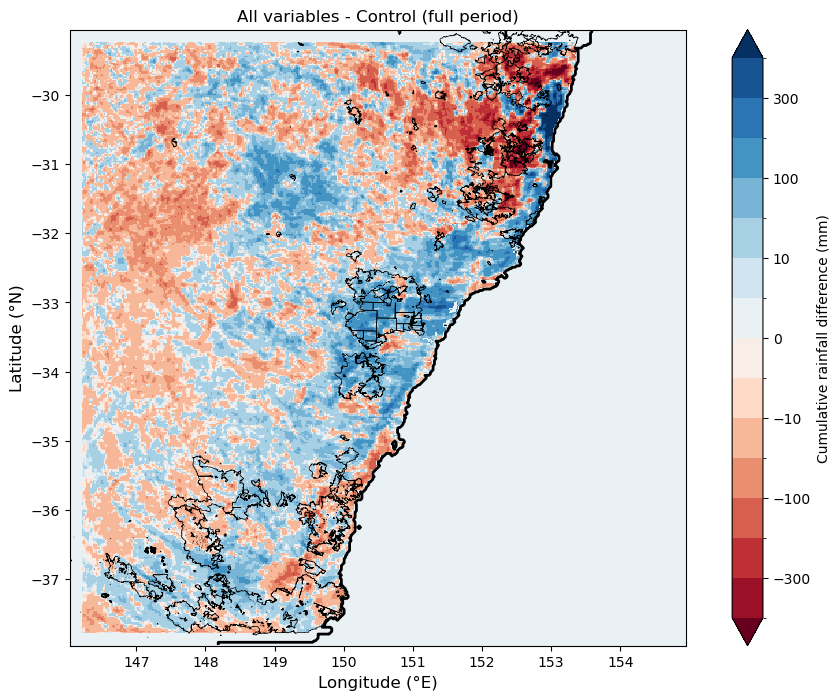

In [10]:
#convert to mm/hour and sum across model period
allvar_total = (allvar * 3600).sum(dim="time", skipna=True)
control_total = (control * 3600).sum(dim="time", skipna=True)

#difference 
diff_total = allvar_total - control_total


fig, ax = plt.subplots(figsize=(12, 8))
diff_total.plot(
    ax=ax,
    cmap='RdBu',
    center=0,
    levels=[-400, -300, -200, -100, -50, -10, -5, 0, 5, 10, 50, 100, 200, 300, 400],
    extend='both',
    cbar_kwargs={'label': 'Cumulative rainfall difference (mm)'}
)

contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries(merged_fires.boundary).plot(
    ax=ax, edgecolor="black", linewidth=0.5
)

plt.title("All variables - Control (full period)")
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.show()


## Difference Feb

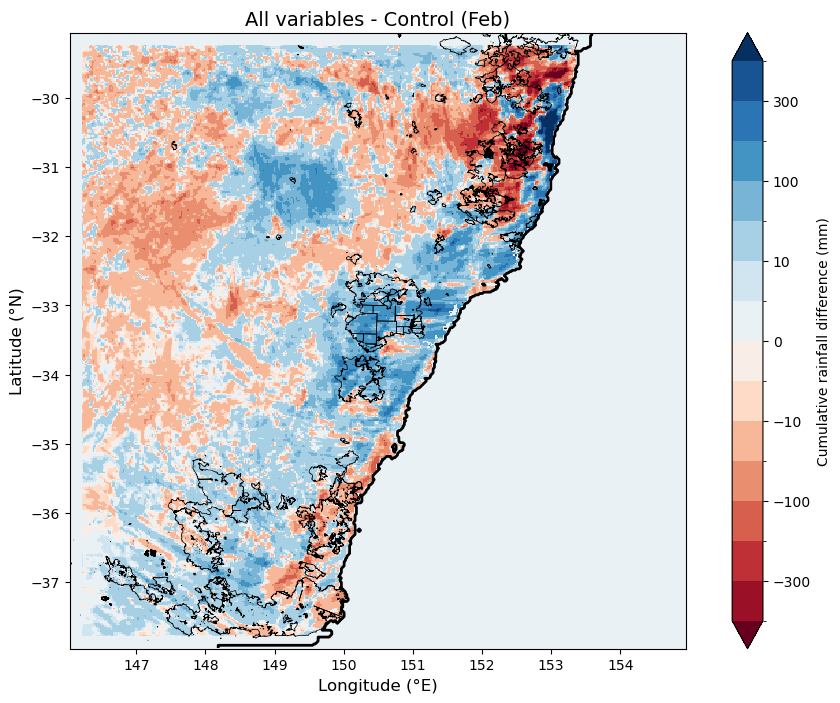

In [14]:
start_date = '2020-02-01'
end_date = '2020-02-13'

allvar_feb = allvar.sel(time=slice(start_date, end_date))
control_feb = control.sel(time=slice(start_date, end_date))

allvar_feb = (allvar_feb * 3600).sum(dim="time", skipna=True)
control_feb = (control_feb * 3600).sum(dim="time", skipna=True)

diff_feb = allvar_feb - control_feb

fig, ax = plt.subplots(figsize=(12, 8))
diff_feb.plot(
    ax=ax,
    cmap='RdBu',
    center=0,
    levels=[-400, -300, -200, -100, -50, -10, -5, 0, 5, 10, 50, 100, 200, 300, 400],
    extend='both',
    cbar_kwargs={'label': 'Cumulative rainfall difference (mm)'}
)

contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries([merged_fires]).plot(
    ax=ax, facecolor="none", edgecolor="black", linewidth=0.5
)

plt.title("All variables - Control (Feb)", fontsize=14)
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.show()

## Difference (Jan)

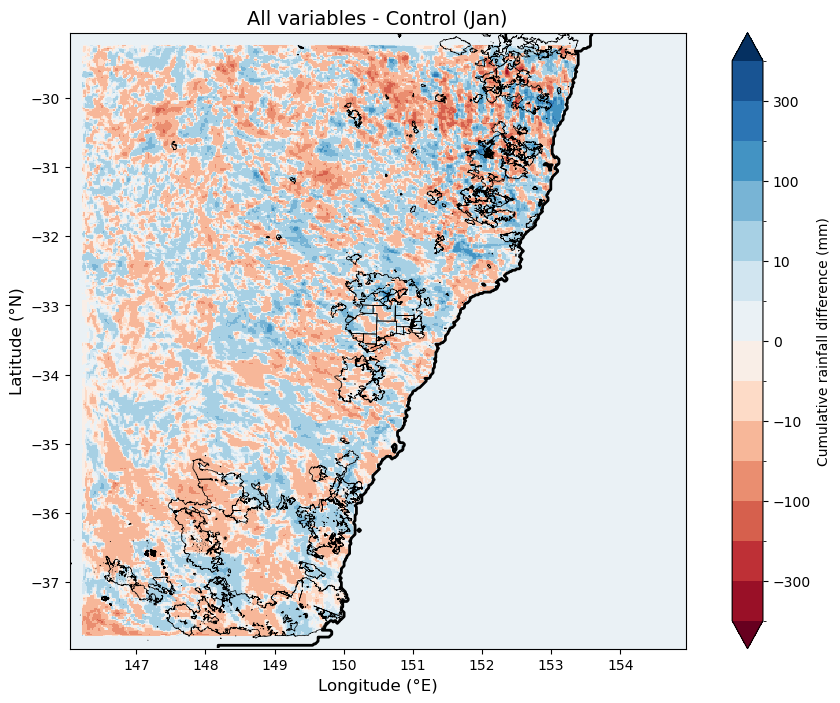

In [17]:
start_date = '2020-01-14'
end_date = '2020-01-31'

allvar_jan = allvar.sel(time=slice(start_date, end_date))
control_jan = control.sel(time=slice(start_date, end_date))

allvar_jan = (allvar_jan * 3600).sum(dim="time", skipna=True)
control_jan = (control_jan * 3600).sum(dim="time", skipna=True)

diff_jan = allvar_jan - control_jan

fig, ax = plt.subplots(figsize=(12, 8))
diff_jan.plot(
    ax=ax,
    cmap='RdBu',
    center=0,
    levels=[-400, -300, -200, -100, -50, -10, -5, 0, 5, 10, 50, 100, 200, 300, 400],
    extend='both',
    cbar_kwargs={'label': 'Cumulative rainfall difference (mm)'}
)

contours2 = sa1.plot.contour(ax=ax, levels=[0], colors='black', linewidths=2, add_colorbar=False)

gpd.GeoSeries([merged_fires]).plot(
    ax=ax, facecolor="none", edgecolor="black", linewidth=0.5
)

plt.title("All variables - Control (Jan)", fontsize=14)
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.show()